# <center>  <font color=blue> Understanding The problematic Of The Project  : An Overview </center>  
![](https://img00.deviantart.net/e3fa/i/2017/024/c/6/onirbaan_bengali_logo_by_botagainsthumanity-dawkgdn.png)

   

# Introduction: 
Solving problems with Artificial intelligence in a competitive manner has long been absent in Bangladesh and Bengali-speaking community. On the other hand, there has not been a well structured database for Bengali Handwritten digits for mass public use. To bring out the best minds working in machine learning and use their expertise to create a model which can easily recognize Bengali Handwritten digits, Bengali.AI organize Computer Vision Challenge.

# About Bengali: 
Bengali (/bɛŋˈɡɔːli/),also known by its endonym Bangla , is an Indo-Aryan language primarily spoken by the Bengalis in South Asia. It is the official and most widely spoken language of Bangladesh and second most widely spoken of the 22 scheduled languages of India, behind Hindi. With approximately 228 million native speakers and another 37 million as second language speakers,Bengali is the fifth most-spoken native language and the seventh most spoken language by total number of speakers in the world.

# About Bengali.AI:
Bengali.AI is a community working to solve the absence of open-sourced datasets for Bengali Computer Vision/Natural Language Processing research. Bengali.AI has launched a pilot competition through which we are also making our first dataset public, which has more than 85,000+ Bengali Handwritten Digits. It’s a month-long online machine learning competition where the participants have to train their computer/model on our open-sourced database ‘NumtaDB’ to be able to detect handwritten Bengali digits (০,১,২,৩,...) and test the performance on a hidden test set through Kaggle’s online platform. It is the first of a series of competitions called “Bengali.AI Computer Vision Challenge” through which we wish to open-source more datasets in the future.  

### Website :    <center>            http://www.bengali.ai </center>  
### Industry: <center> Research </center>
### Company size : <center> 2-10 employees </center>
### Headquarters : <center> Dhaka,Dhaka </center>
### Type: <center> Sole Proprietorship </center>
### Founded : <center> 2018 </center>

# What is Grapheme ? 
One of a set of orthographic symbols (letters or combinations of letters) in a given language that serve to distinguish one word from another and usually correspond to or represent phonemes, e. g. the f in fun, the ph in phantom, and the gh in laugh.
A grapheme is a written symbol that represents a sound (phoneme). This can be a single letter, or could be a sequence of letters, such as ai, sh, igh, tch etc. So when we say the sound /t/ this is a phoneme, but when we write the letter 't' this is a grapheme.

# What is the diacritics: 
In phonetics, a diacritical mark is a  symbol—added to a letter that alters its sense, function, or pronunciation. It is also known as a diacritic or an accent mark. A diacritical mark is a point, sign, or squiggle added or attached to a letter or character to indicate appropriate stress, special pronunciation, or unusual sounds not common in the Roman alphabet.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/banglafonts/SolaimanLipi.ttf
/kaggle/input/bengaliai-cv19/test_image_data_2.parquet
/kaggle/input/bengaliai-cv19/test_image_data_3.parquet
/kaggle/input/bengaliai-cv19/test_image_data_0.parquet
/kaggle/input/bengaliai-cv19/train.csv
/kaggle/input/bengaliai-cv19/test_image_data_1.parquet
/kaggle/input/bengaliai-cv19/class_map.csv
/kaggle/input/bengaliai-cv19/train_image_data_3.parquet
/kaggle/input/bengaliai-cv19/train_image_data_2.parquet
/kaggle/input/bengaliai-cv19/test.csv
/kaggle/input/bengaliai-cv19/sample_submission.csv
/kaggle/input/bengaliai-cv19/train_image_data_1.parquet
/kaggle/input/bengaliai-cv19/train_image_data_0.parquet


# Importing datas:

In [2]:
train=pd.read_csv('/kaggle/input/bengaliai-cv19/train.csv')
test=pd.read_csv('/kaggle/input/bengaliai-cv19/test.csv')
submission=pd.read_csv('/kaggle/input/bengaliai-cv19/sample_submission.csv')
class_map=pd.read_csv('/kaggle/input/bengaliai-cv19/class_map.csv')

# Data explorations:

In [3]:
# An overview on training data.
train.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [4]:
# General statistics on our training data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200840 entries, 0 to 200839
Data columns (total 5 columns):
image_id               200840 non-null object
grapheme_root          200840 non-null int64
vowel_diacritic        200840 non-null int64
consonant_diacritic    200840 non-null int64
grapheme               200840 non-null object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB


In [5]:
# An overview on class_map data
class_map.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [6]:
# General statstics on class_map data.
class_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
component_type    186 non-null object
label             186 non-null int64
component         186 non-null object
dtypes: int64(1), object(2)
memory usage: 4.5+ KB


In [7]:
# An overview on test data.
test.head()

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root


In [8]:
# General infos on test datas.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
row_id       36 non-null object
image_id     36 non-null object
component    36 non-null object
dtypes: object(3)
memory usage: 992.0+ bytes


<font color='blue'> The above analyse show that our datas don't encompass any missing values .   
Let's continue !</font>


In [9]:
# Now we will give a table which summarize our datasets shapes.
data=[train,test,class_map,submission]
data_names=['train','test','class_map','submission']
tb=pd.DataFrame({'dataset':data_names,'shapes':[c.shape for c in data]})
tb

,dataset,shapes
0,train,"(200840, 5)"
1,test,"(36, 3)"
2,class_map,"(186, 3)"
3,submission,"(36, 2)"


In [10]:
# Now we will give a table which summarize the number of uniques values, per each element in the grapheme 
#used in the training images.
elements=['grapheme_root','vowel_diacritic','consonant_diacritic']
tble=pd.DataFrame({'element':elements,'counts':[len(train[c].unique()) for c in elements]})
tble

,element,counts
0,grapheme_root,168
1,vowel_diacritic,11
2,consonant_diacritic,7


In [11]:
def most_used_element(df,element,n):
    """This function allow to determinate the n  most used value per each type element in our training
       data.
       
       Args:
       df(dataframe): the introduced dataset which contrain the training data that the function will 
                      analyse
       element(str): the element type that we want to analyse his frequency .
       n(int): the number of the top used elemement that we want to extracte.
       
       Returns:
       
       dff(Dataframe): the dataframe wich will give the requested most used components with their frequency
                       of using.
       
       """
    sorted_element=df[element].value_counts(normalize=False,sort=True, ascending=False).reset_index\
    (name='frequency')[0:n]
    ddf=class_map[class_map['component_type']==element]
    components=[]
    for i in range(n):
        lb=sorted_element.loc[i,'index']
        comp=ddf[ddf['label']==lb].index[0]
        components.append(comp)
    ddf=ddf.loc[components].drop(['component_type','label'],axis=1)
    ddf['frequency']=sorted_element['frequency'].to_numpy()
    
    return ddf

In [12]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

def draw_char(char):
    """This function allow to draw image from the component which represent each element.
    
    Args: 
    char(str): it's the component of the element that we want to draw his image .
    
    Returns:
    img(PIL image): the drawn image from the introduced component which represent the bengali element.
    
    """
    height=236
    width=236
    img=Image.new('RGB',(width,height))
    draw=ImageDraw.Draw(img)
    font=ImageFont.truetype('/kaggle/input/banglafonts/SolaimanLipi.ttf',120)
    w,h=draw.textsize(char,font=font)
    draw.text(((width-w)/2,(height-h)/2),char,font=font)
    return img 

In [13]:
# the 10 most used grapheme root 
grapheme_root_10=most_used_element(train,'grapheme_root',10)
grapheme_root_10

,component,frequency
72,দ,5736
64,ত,5596
13,ক,5420
107,ব,5321
23,গ,5149
96,প,4926
113,ভ,4395
147,স,4392
133,শ,4374
115,ম,4015


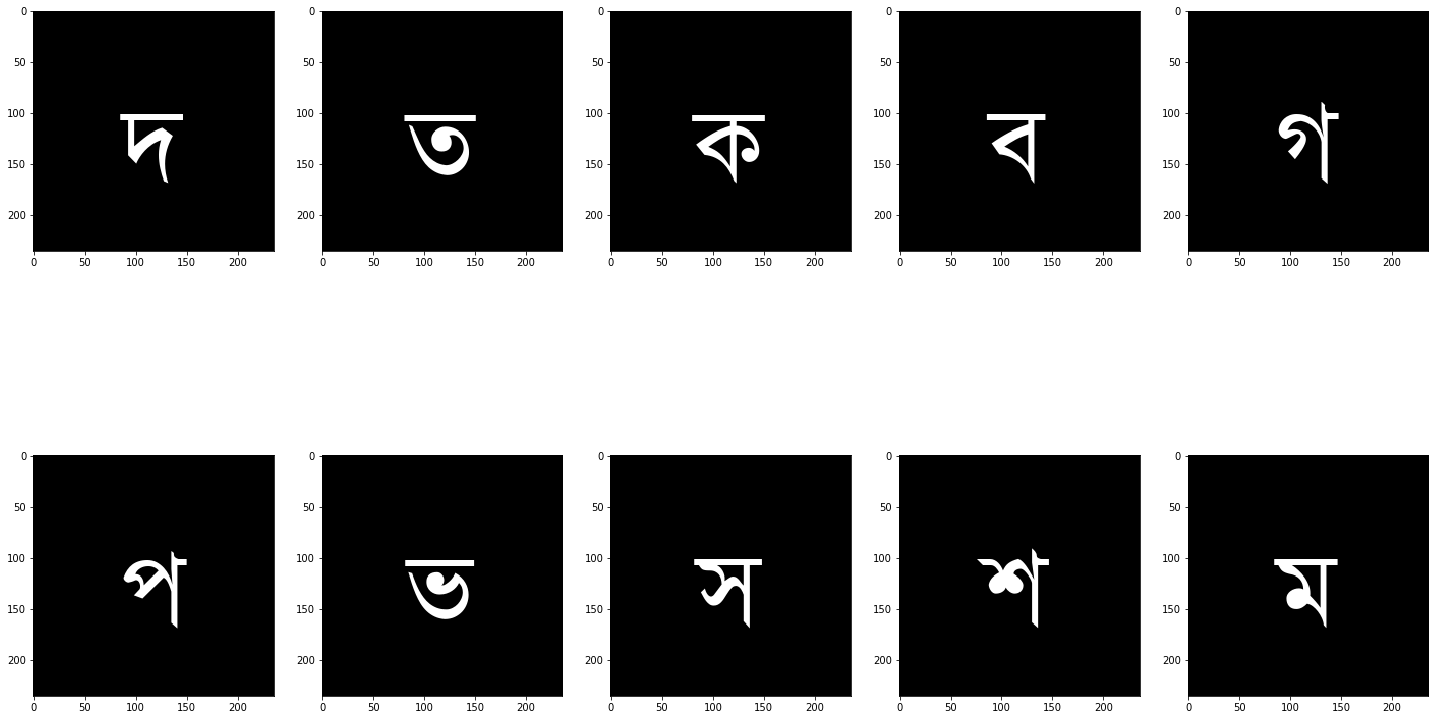

In [14]:
# Visualisation of the most used grapheme_root
import matplotlib.pyplot as plt 
fig,ax=plt.subplots(2,5,figsize=(25,15))
ax=ax.flatten()
for i in range(10):
   ax[i].imshow(draw_char(grapheme_root_10['component'].iloc[i]),cmap='Greys')

In [15]:
# The 5 most used vowel_diacritic
vowel_diacritic_5=most_used_element(train,'vowel_diacritic',5)
vowel_diacritic_5

,component,frequency
168,0,41508
169,া,36886
175,ে,28723
170,ি,25967
172,ু,18848


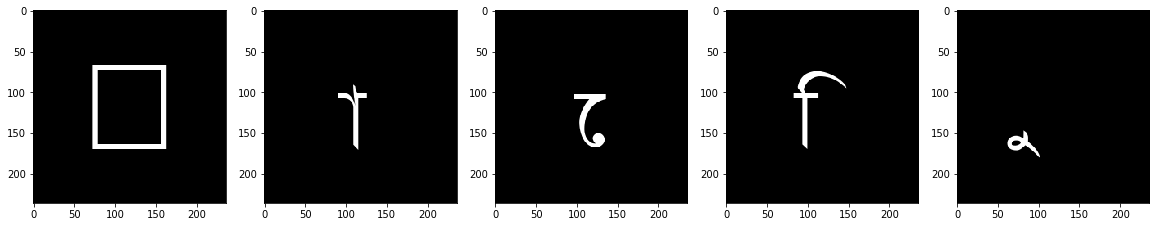

In [16]:
# Visualization of the most used vowel_diacritic
fig=plt.figure(figsize=(20,20))
for i in range(5):
    fig.add_subplot(151+i)
    plt.imshow(draw_char(vowel_diacritic_5['component'].iloc[i]),cmap='Greys')

In [17]:
# The 5 most used consonant_diacritic
vowel_diacritic_5=most_used_element(train,'consonant_diacritic',5)
vowel_diacritic_5

,component,frequency
179,0,125278
181,র্,23465
184,্র,21397
183,্য,21270
180,ঁ,7424


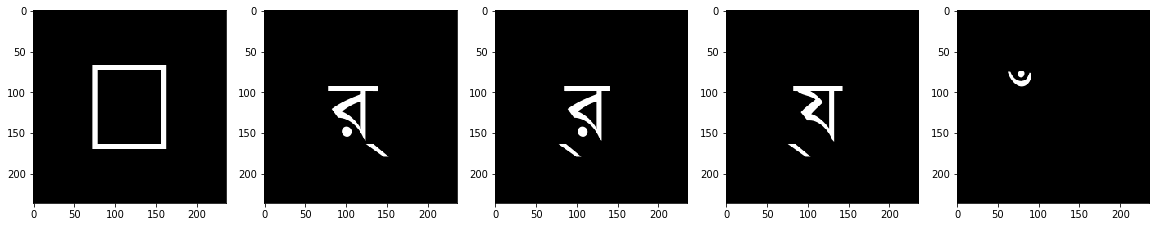

In [18]:
#Visualization of the most used consonant_diacritic
fig,ax=plt.subplots(1,5,figsize=(20,20))
ax=ax.flatten()
for i in range(5):
    ax[i].imshow(draw_char(vowel_diacritic_5['component'].iloc[i]),cmap='Greys')

# Images visualizations :

In [19]:
def image_visualization(dt,image_id):
    """This function allow to return the pixel matrix of the image correspond to the introduced image_id,in
       the introduced dataframe. The function return also the grapheme_root,consonant_diacritic and the 
       vowel_diacritic correspond to the introduced image_id. If the introduced image_id not found in the 
       introduced dataframe, the function return None.
       
       Args:
       dt(DataFrame): the introduced dataframe that the function will use to extract the matrix pixel correspond
                      to the introduced image_id .
       image_id(str): The image_id of the image that we want to extract there datas and their labels .
       
       Returns: 
       im,grapheme_root,consonant_diacritic,vowel_diacritic (tuple): the pixel matrix of the grey image and their
       labels if exist.

       """
    
    im=dt[dt['image_id']==image_id].values.flatten()[1:]
    if im.size > 0 :
        im=im.astype('float').reshape(137,236)
        tr=train[train['image_id']==image_id].index
        grapheme_root=train.iloc[tr[0]]['grapheme_root']
        consonant_diacritic=train.iloc[tr[0]]['consonant_diacritic']
        vowel_diacritic=train.iloc[tr[0]]['vowel_diacritic']
        return im,grapheme_root,consonant_diacritic,vowel_diacritic
        
        
    else :
        return(None)

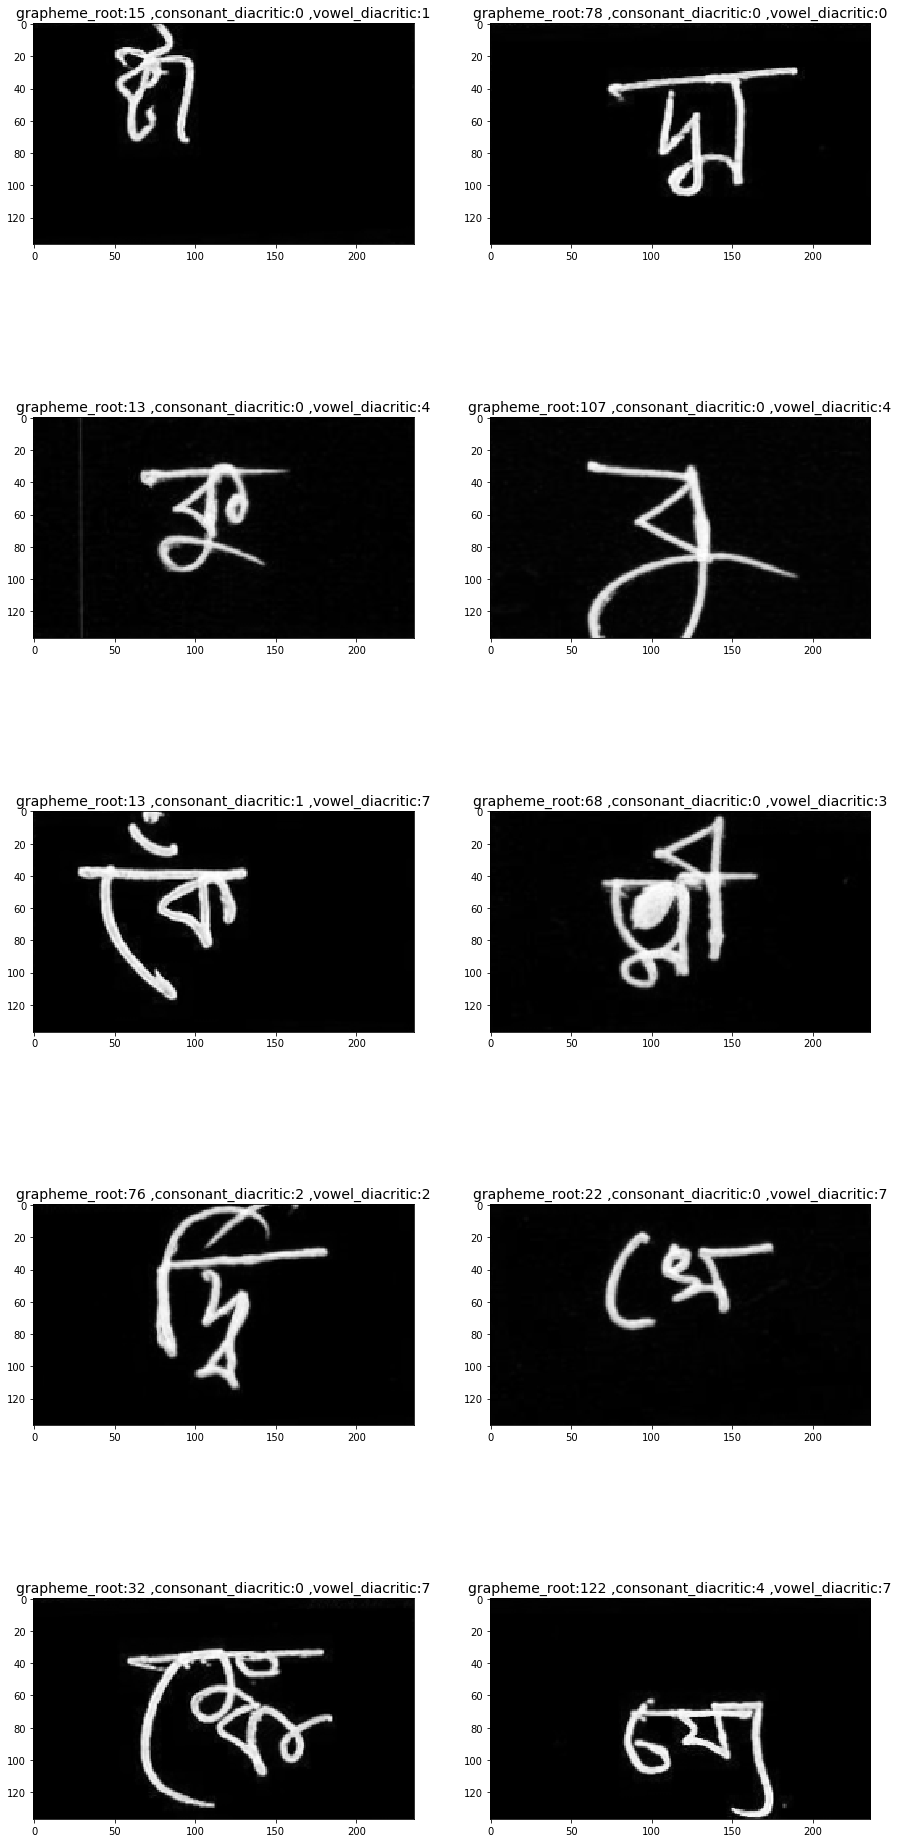

In [20]:
import random
seq=random.sample(list(train.index),100) # generate a random 100 values from the index values of the train datas
fig,ax=plt.subplots(5,2,figsize=(15,35))
ax=ax.flatten()
j=1
f='/kaggle/input/bengaliai-cv19/train_image_data_0.parquet'
df=pd.read_parquet(f)
for i in seq :
    image_id=train.iloc[i]['image_id']
    vis=image_visualization(df,image_id)
    if (vis is not None) & (j<=10):
       
       
       ax[j-1].imshow(vis[0],cmap='Greys')
       ax[j-1].set_title("grapheme_root:{} ,consonant_diacritic:{} ,vowel_diacritic:{}".format(vis[1],vis[2],vis[3]),fontsize=14)
       
       j+=1

# Image preprocessing :

In [21]:
import keras
# create class which allow to data augmentation for multioutput. 
class MultiOutputDataGenerator(keras.preprocessing.image.ImageDataGenerator):

    def flow(self,
             x,
             y=None,
             batch_size=32,
             shuffle=True,
             sample_weight=None,
             seed=None,
             save_to_dir=None,
             save_prefix='',
             save_format='png',
             subset=None):

        targets = None
        target_lengths = {}
        ordered_outputs = []
        for output, target in y.items():
            if targets is None:
                targets = target
            else:
                targets = np.concatenate((targets, target), axis=1)
            target_lengths[output] = target.shape[1]
            ordered_outputs.append(output)


        for flowx, flowy in super().flow(x, targets, batch_size=batch_size,
                                         shuffle=shuffle):
            target_dict = {}
            i = 0
            for output in ordered_outputs:
                target_length = target_lengths[output]
                target_dict[output] = flowy[:, i: i + target_length]
                i += target_length

            yield flowx, target_dict

Using TensorFlow backend.


In [22]:
from PIL import Image , ImageOps
def preprocessing (img):
    """ """
    image= Image.fromarray(img).convert('L')
    image= ImageOps.autocontrast(image)
    return image

Text(0.5, 1.0, 'preprocessed image')

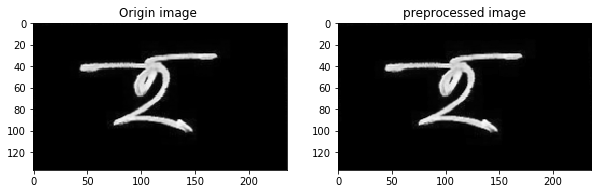

In [23]:
# Visualize how the threshol operation, could ameliorate the image quality
sample_image=df.drop(['image_id'],axis=1).loc[df.index[1]]
sample_image=sample_image.values.astype('float').reshape(137,236)
threshold_image=preprocessing(sample_image)

fig,ax=plt.subplots(1,2,figsize=(10,20))
ax=ax.flatten()
ax[0].imshow(sample_image , cmap='Greys')
ax[0].set_title('Origin image ')
ax[1].imshow(threshold_image , cmap='Greys')
ax[1].set_title('preprocessed image')


In [24]:
np.array(threshold_image)

array([[250, 243, 237, ..., 255, 255, 255],
       [251, 251, 249, ..., 255, 255, 255],
       [247, 247, 249, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 253],
       [255, 255, 255, ..., 255, 255, 253]], dtype=uint8)

In [25]:
from tqdm.auto import tqdm
import cv2
def resize(df, size=64, need_progress_bar=True):
    resized = {}
    resize_size=64
    if need_progress_bar:
        for i in tqdm(range(df.shape[0])):
            image=df.loc[df.index[i]].values.reshape(137,236)
            img=preprocessing(image)
            img=np.array(img)
            
            _, thresh = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            contours, _ = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]

            idx = 0 
            ls_xmin = []
            ls_ymin = []
            ls_xmax = []
            ls_ymax = []
            for cnt in contours:
                idx += 1
                x,y,w,h = cv2.boundingRect(cnt)
                ls_xmin.append(x)
                ls_ymin.append(y)
                ls_xmax.append(x + w)
                ls_ymax.append(y + h)
            xmin = min(ls_xmin)
            ymin = min(ls_ymin)
            xmax = max(ls_xmax)
            ymax = max(ls_ymax)

            roi = img[ymin:ymax,xmin:xmax]
            resized_roi = cv2.resize(roi, (resize_size, resize_size),interpolation=cv2.INTER_AREA)
            resized[df.index[i]] = resized_roi.reshape(-1)
    else:
        for i in range(df.shape[0]):
            #image = cv2.resize(df.loc[df.index[i]].values.reshape(137,236),(size,size),None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
            image=df.loc[df.index[i]].values.reshape(137,236)
            _, thresh = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            contours, _ = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]

            idx = 0 
            ls_xmin = []
            ls_ymin = []
            ls_xmax = []
            ls_ymax = []
            for cnt in contours:
                idx += 1
                x,y,w,h = cv2.boundingRect(cnt)
                ls_xmin.append(x)
                ls_ymin.append(y)
                ls_xmax.append(x + w)
                ls_ymax.append(y + h)
            xmin = min(ls_xmin)
            ymin = min(ls_ymin)
            xmax = max(ls_xmax)
            ymax = max(ls_ymax)

            roi = image[ymin:ymax,xmin:xmax]
            resized_roi = cv2.resize(roi, (resize_size, resize_size),interpolation=cv2.INTER_AREA)
            resized[df.index[i]] = resized_roi.reshape(-1)
    resized = pd.DataFrame(resized).T
    return resized

# CNN architecture 

In [26]:
from keras.models import Sequential , Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Input,BatchNormalization,MaxPool2D,Input


Inputs= Input(shape=(64,64,1)) # create a cnn 
# add the first convolutional layer, followed by a relu layer .
model=(Conv2D(32,(3,3),input_shape=(64,64,1),padding='same',activation='relu'))(Inputs)
# add a second convolutional layer, followed by a relu layer .
model=(Conv2D(32,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(32,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(32,(3,3),padding='same',activation='relu'))(model)
model=(MaxPool2D(pool_size=(2,2),strides=(2,2)))(model)
model=(Conv2D(32,(3,3),padding='same',activation='relu'))(model)
model=BatchNormalization(momentum=0.15)(model)
model=Dropout(rate=0.3)(model)
model=(Conv2D(64,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(64,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(64,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(64,(3,3),padding='same',activation='relu'))(model)
model=(MaxPool2D(pool_size=(2,2),strides=(2,2)))(model)
model=(Conv2D(64,(3,3),padding='same',activation='relu'))(model)
model=BatchNormalization(momentum=0.15)(model)
model=Dropout(rate=0.3)(model)
model=(Conv2D(128,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(128,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(128,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(128,(3,3),padding='same',activation='relu'))(model)
model=(MaxPool2D(pool_size=(2,2),strides=(2,2)))(model)
model=(Conv2D(128,(3,3),padding='same',activation='relu'))(model)
model=BatchNormalization(momentum=0.15)(model)
model=Dropout(rate=0.3)(model)
model=(Conv2D(256,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(256,(3,3),padding='same',activation='relu'))(model)
model=(MaxPool2D(pool_size=(2,2),strides=(2,2)))(model)
model=(Conv2D(256,(3,3),padding='same',activation='relu'))(model)
model=(Conv2D(256,(3,3),padding='same',activation='relu'))(model)
model=(MaxPool2D(pool_size=(2,2),strides=(2,2)))(model)
model=(Conv2D(256,(3,3),padding='same',activation='relu'))(model)
model=(Flatten())(model)
model=BatchNormalization(momentum=0.15)(model)
model=Dropout(rate=0.3)(model)
model=Dense(1024,activation='relu')(model)

dense=Dense(512,activation='relu')(model)
subdense=Dense(256,activation='relu')(dense)
consonant=Dense(7,activation='softmax')(dense)
grapheme=Dense(168,activation='softmax')(subdense)
vowel=Dense(11,activation='softmax')(dense)
model=Model(inputs=Inputs,outputs=[consonant,grapheme,vowel])

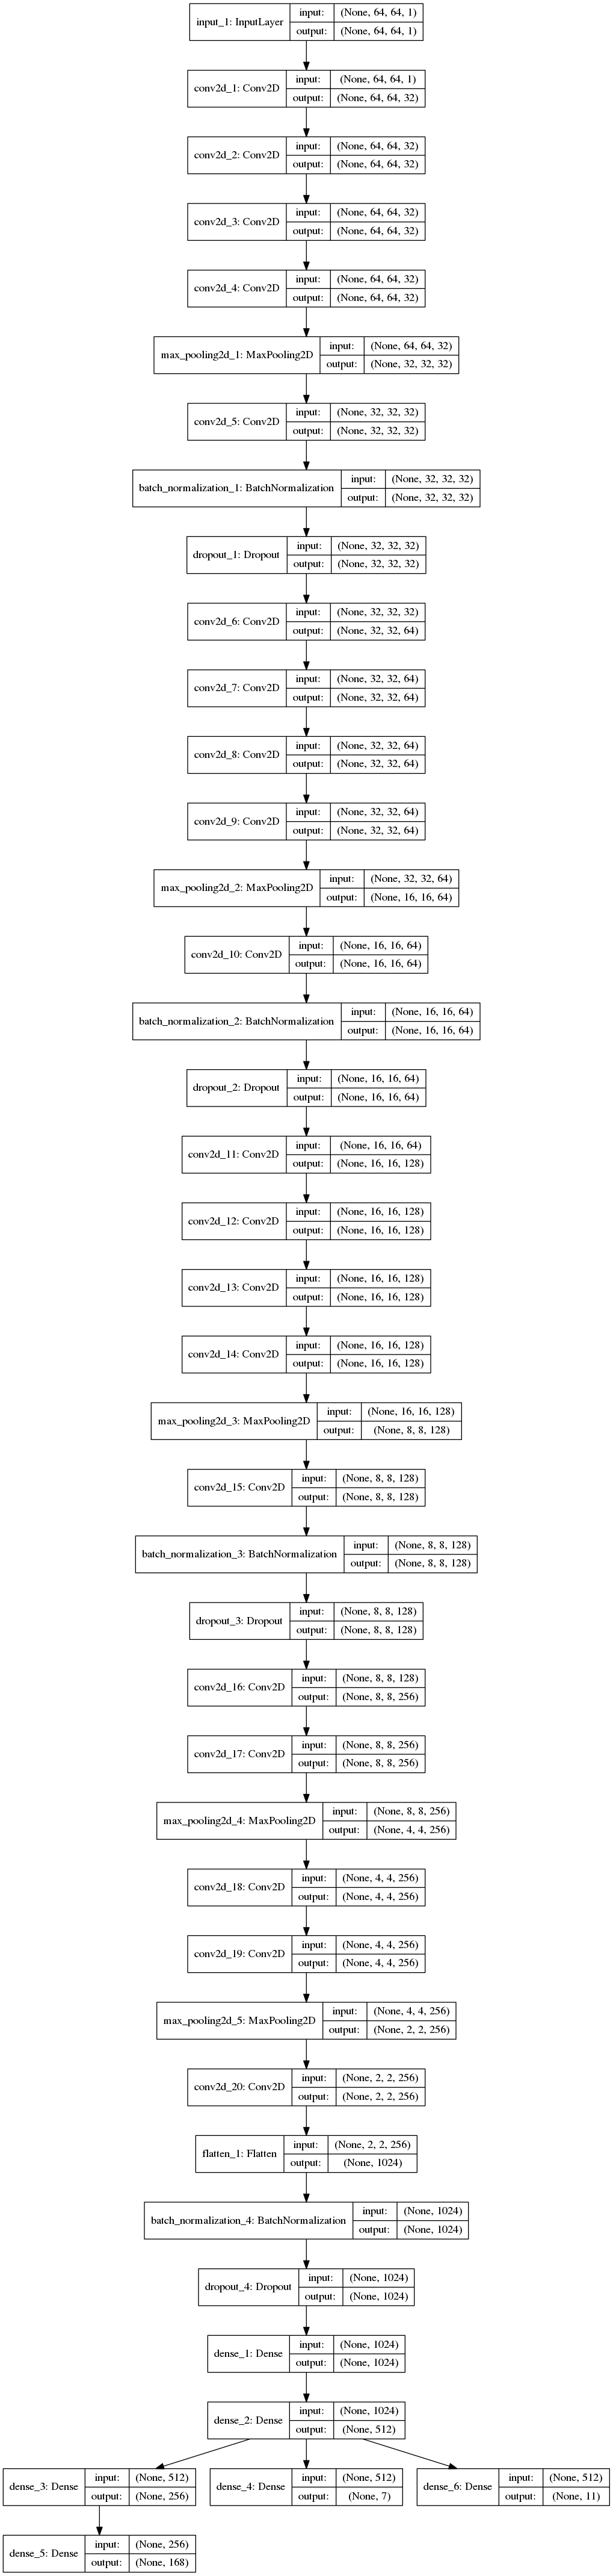

In [27]:
from keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True)

# CNN compilation :

In [28]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
from keras.callbacks import ReduceLROnPlateau
#Reducing learning rate when accuracy has stopped improving.
#We will use a callback wich will control the accuracy and reduce learning rate by 40% when the quantity
#controlled had not enhanced after 4 epochs 
lr_consonant=ReduceLROnPlateau(monitor='dense_4_accuracy',factor=0.4,patience=4,min_lr=0.00001)
lr_grapheme=ReduceLROnPlateau(monitor='dense_5_accuracy',factor=0.4,patience=4,min_lr=0.00001)
lr_vowel=ReduceLROnPlateau(monitor='dense_6_accuracy',factor=0.4,patience=4,min_lr=0.00001)

# Incremental learning :

Because of the size of the traing data encompassed in the parquet files . We will use hereunder an incremental training method wich allow us to train our network by steps. In each step we load a file parquet and we do all the required operations to train our network, then we get rid of the loaded files to not consume a
huge memory.

In [30]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
for i in range(4):
    df=pd.merge(pd.read_parquet('/kaggle/input/bengaliai-cv19/train_image_data_{}.parquet'.format(i)),train,\
                on='image_id',how='left').drop(['image_id','grapheme'],axis=1)
   
    X=df.drop(['grapheme_root','vowel_diacritic','consonant_diacritic'],axis=1)
    X=resize(X)/255
                                                                                                   
    X=X.to_numpy().reshape(-1,64,64,1)
    Y_consonant=pd.get_dummies(df['consonant_diacritic']).to_numpy()
    Y_grapheme=pd.get_dummies(df['grapheme_root']).to_numpy()
    Y_vowel=pd.get_dummies(df['vowel_diacritic']).to_numpy()
    del(df)
    # Divide the data into training and test data
    xtr,xts,ytr_consonant,yts_consonant,ytr_grapheme,yts_grapheme,ytr_vowel,yts_vowel=train_test_split(X,\
                                                            Y_consonant,Y_grapheme,Y_vowel,test_size=0.1)
    
    del(X)
    del(Y_consonant)
    del(Y_grapheme)
    del(Y_vowel)
    #data augmentation .
    datagen=MultiOutputDataGenerator(rotation_range=10 # rotate the image\
                                    ,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.15)
    datagen.fit(xtr)
    fichier=[]
    #train the model.
    md=model.fit_generator(datagen.flow(xtr,{'dense_4':ytr_consonant,'dense_5':ytr_grapheme,'dense_6':\
                                             ytr_vowel},batch_size=256),steps_per_epoch=len(xtr)/256,\
                          epochs=40,validation_data=(xts,[yts_consonant,yts_grapheme,yts_vowel]),\
                          callbacks=[lr_consonant,lr_grapheme,lr_vowel])
    fichier.append(md)
    # reduce memory
    del(xtr)
    del(xts)
    del(ytr_consonant)
    del(yts_consonant)
    del(ytr_grapheme)
    del(yts_grapheme)
    del(ytr_vowel)
    del(yts_vowel)


Epoch 1/40
177/176 [==============================] - 46s 261ms/step - loss: 7.0565 - dense_4_loss: 1.0285 - dense_5_loss: 4.5598 - dense_6_loss: 1.4682 - dense_4_accuracy: 0.6482 - dense_5_accuracy: 0.0428 - dense_6_accuracy: 0.4786 - val_loss: 5.9744 - val_dense_4_loss: 0.7920 - val_dense_5_loss: 4.2271 - val_dense_6_loss: 0.9545 - val_dense_4_accuracy: 0.7066 - val_dense_5_accuracy: 0.0570 - val_dense_6_accuracy: 0.6736
Epoch 2/40
177/176 [==============================] - 38s 213ms/step - loss: 5.5274 - dense_4_loss: 0.7556 - dense_5_loss: 3.7898 - dense_6_loss: 0.9820 - dense_4_accuracy: 0.7317 - dense_5_accuracy: 0.1132 - dense_6_accuracy: 0.6597 - val_loss: 4.2194 - val_dense_4_loss: 0.5474 - val_dense_5_loss: 3.0759 - val_dense_6_loss: 0.5963 - val_dense_4_accuracy: 0.8096 - val_dense_5_accuracy: 0.1920 - val_dense_6_accuracy: 0.7961
Epoch 3/40
177/176 [==============================] - 38s 217ms/step - loss: 4.0671 - dense_4_loss: 0.5484 - dense_5_loss: 2.7632 - dense_6_loss:

177/176 [==============================] - 35s 200ms/step - loss: 0.5473 - dense_4_loss: 0.1001 - dense_5_loss: 0.2849 - dense_6_loss: 0.1623 - dense_4_accuracy: 0.9682 - dense_5_accuracy: 0.9144 - dense_6_accuracy: 0.9491 - val_loss: 0.5168 - val_dense_4_loss: 0.0883 - val_dense_5_loss: 0.3319 - val_dense_6_loss: 0.0967 - val_dense_4_accuracy: 0.9761 - val_dense_5_accuracy: 0.9271 - val_dense_6_accuracy: 0.9735
Epoch 18/40
177/176 [==============================] - 36s 205ms/step - loss: 0.5280 - dense_4_loss: 0.0983 - dense_5_loss: 0.2694 - dense_6_loss: 0.1603 - dense_4_accuracy: 0.9697 - dense_5_accuracy: 0.9185 - dense_6_accuracy: 0.9500 - val_loss: 0.4495 - val_dense_4_loss: 0.0793 - val_dense_5_loss: 0.2834 - val_dense_6_loss: 0.0883 - val_dense_4_accuracy: 0.9787 - val_dense_5_accuracy: 0.9331 - val_dense_6_accuracy: 0.9757
Epoch 19/40
177/176 [==============================] - 36s 201ms/step - loss: 0.5309 - dense_4_loss: 0.1001 - dense_5_loss: 0.2705 - dense_6_loss: 0.1602 - 

In [31]:
ant=[]
for i in range(4):
    ts=pd.read_parquet('/kaggle/input/bengaliai-cv19/test_image_data_{}.parquet'.format(i))
    ts=ts.drop(['image_id'],axis=1)
    ts=resize(ts,need_progress_bar=True)
    tss=ts.to_numpy()/255
    tss=tss.reshape(-1,64,64,1)
    prediction=model.predict(tss)
    l=len(ts)
    del(ts)
    m=0
    del(tss)
    for j in range(l):
        ant.append(np.argmax(prediction[0][m]))
        ant.append(np.argmax(prediction[1][m]))
        ant.append(np.argmax(prediction[2][m]))
        m+=1

In [32]:
submission['target']=ant

In [33]:
submission

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,3
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,93
5,Test_1_vowel_diacritic,2
6,Test_2_consonant_diacritic,0
7,Test_2_grapheme_root,19
8,Test_2_vowel_diacritic,0
9,Test_3_consonant_diacritic,0


In [34]:
submission.to_csv('submission.csv',index=False)